In [7]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
import random
import matplotlib.colors as mcolors
from pandas_profiling import ProfileReport


blockbusters_df = pd.read_csv("data/blockbusters.csv")
moviebudget_df= pd.read_csv("data/Movie_budget.csv")
movieid_df= pd.read_csv("data/metadata.csv")

#Merging and cleaning data 
#Merge 1
budgetbuster_df = pd.merge(moviebudget_df,blockbusters_df, how = "right", on = "Title")
budgetbuster_df = budgetbuster_df.drop(["Worldwide_gross","Release Date","length", "rank_in_year", "rating","Year_x"], axis=1, inplace = False)
budgetbuster_df = budgetbuster_df.rename(columns={"Year_y":"Year"})
budgetbuster_df = budgetbuster_df.dropna(axis=0,inplace= False)
budgetbuster_df["Production Budget"] = budgetbuster_df["Production Budget"].astype(float)
budgetbuster_df["Domestic Gross"] = budgetbuster_df["Domestic Gross"].astype(float)
budgetbuster_df["Worldwide Gross"] = budgetbuster_df["Worldwide Gross"].astype(float)
budgetbuster_df = budgetbuster_df.drop_duplicates(subset=["Title","Year"],inplace= False)
budgetbuster_df.to_csv("datacreatedcsv/budgetbuster.csv", index_label="Movie ID")
budgetbuster_df

/var/folders/7n/69c43vz1219_5v9rz55v0vk40000gn/T/ipykernel_10472/2915149892.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movieid_df= pd.read_csv("data/metadata.csv")


,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year
0,48,Black Panther,"200,000,000.00","700,059,566.00","1,336,494,320.00",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018
1,5,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,359,754.00",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018
2,50,Incredibles 2,"200,000,000.00","608,581,744.00","1,242,805,359.00",Animation,Action,Adventure,7.80,Pixar,2018
3,144,Jurassic World: Fallen Kingdom,"170,000,000.00","417,719,760.00","1,308,323,302.00",Action,Adventure,Drama,6.20,Universal Pictures,2018
7,11,Solo: A Star Wars Story,"275,000,000.00","213,767,512.00","393,151,347.00",Action,Adventure,Drama,7.00,Walt Disney Pictures,2018
...,...,...,...,...,...,...,...,...,...,...,...
442,"4,918",Annie Hall,"4,000,000.00","38,251,425.00","38,251,425.00",Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977
447,"2,387",The Omen,"25,000,000.00","54,607,383.00","119,295,584.00",Thriller,Horror,Drama,7.60,20th Century Fox,1976
450,44,King Kong,"207,000,000.00","218,080,025.00","550,517,357.00",Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976
455,445,Midway,"100,000,000.00","56,846,802.00","126,815,030.00",History,Drama,Action,6.70,Universal Pictures,1976


In [11]:
production_budget_genre_df = budgetbuster_df.groupby(["Main Genre"]).mean()["Production Budget"].sort_values(ascending=False);pd.options.display.float_format = "{:,.2f}".format;budgetbuster_df.sort_values(by=["Production Budget"], ascending=True)
production_budget_genre_df = pd.DataFrame(production_budget_genre_df)
production_budget_genre_df

,Production Budget
Main Genre,
Action,"190,500,000.00"
Fantasy,"137,413,793.10"
Animation,"127,694,444.44"
Sci-Fi,"127,471,428.57"
Horror,"121,000,000.00"
Comedy,"108,732,142.86"
Drama,"102,538,461.54"
History,"101,666,666.67"
Family,"83,666,666.67"


*Average Production Budget per Main Genre

Breakdown of average production costs per main movie genre reflects that Action movies account for the largest average budget per movie with an average of $190,500,000.00 per movie. Sports movies account for the smallest average budget per movie with an average of $10,250,000.00 per movie. 

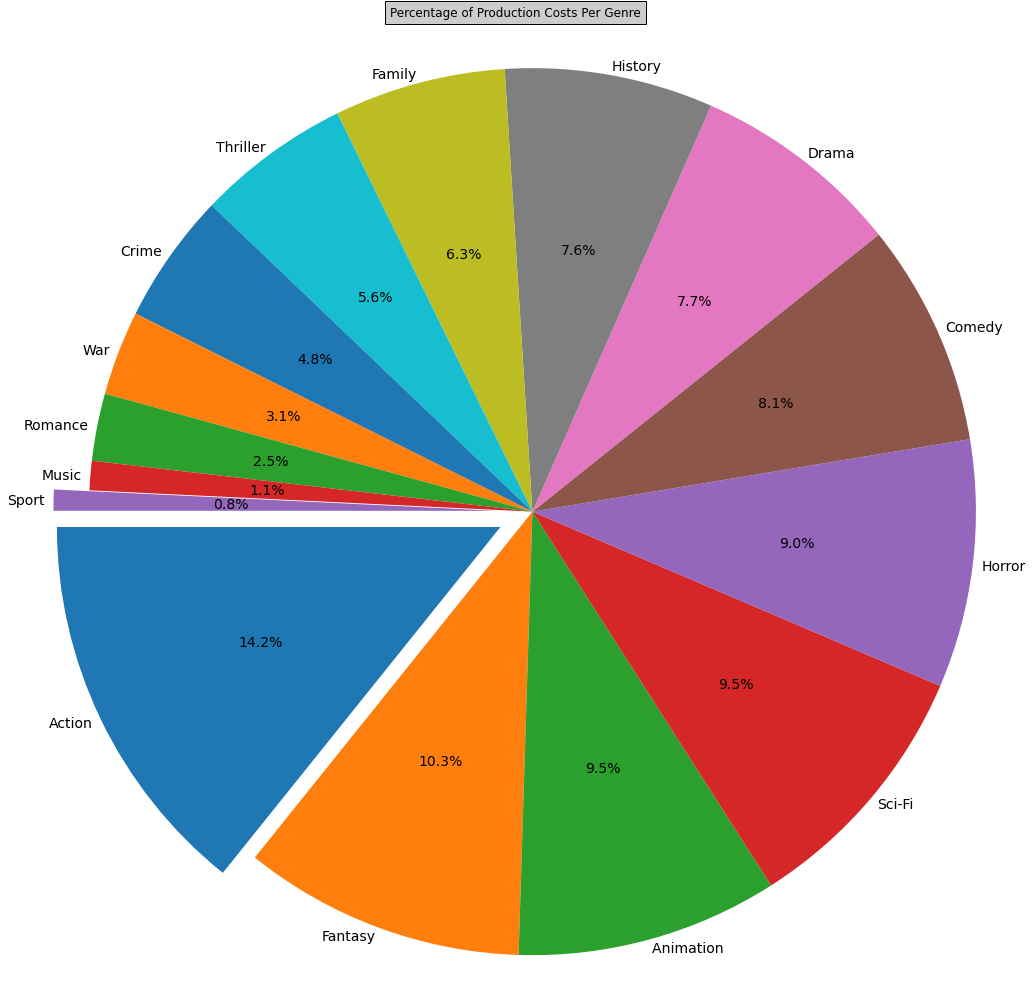

In [20]:
number_of_colors = 15

# Labels for the sections of our pie chart
labels = ["Action", "Fantasy", "Animation ", "Sci-Fi", "Horror", "Comedy", "Drama", "History", "Family", "Thriller", "Crime", "War", "Romance", "Music", "Sport"]

# The values of each section of the pie chart
sizes = [190500000.00, 137413793.10, 127694444.44, 127471428.57, 121000000.00, 108732142.86, 102538461.54, 101666666.67, 83666666.67, 75167826.42, 63750000.00, 41250000.00, 32852941.18, 14250000.00, 10250000.00]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.08,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.08)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels, autopct="%0.1f%%", labeldistance=1.02, textprops={'fontsize': 14}, startangle=180, explode=explode, shadow=False)
ax1.axis('equal') 
plt.title("Percentage of Production Costs Per Genre", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [14]:
studios_df = budgetbuster_df.groupby(["Studio"])
studios_grouped_df = studios_df.size().sort_values(ascending=False)
studios_grouped_df = pd.DataFrame(studios_grouped_df)
studios_grouped_df

,0
Studio,
Walt Disney Pictures,38
Warner Bros,38
Universal Pictures,33
Paramount Pictures,32
20th Century Fox,23
Metro-Goldwyn-Mayer,14
Columbia Pictures,12
DreamWorks,10
Sony Pictures,9


* Total Movies Per Studio

Breakdown of toal movies produces per studio reflect that Walt Disney Pictures and Warner Bros each had the greatest amount of movies with 38 each. Embassy Pictures accounts for the fewest amounts of movies with only one movie. 

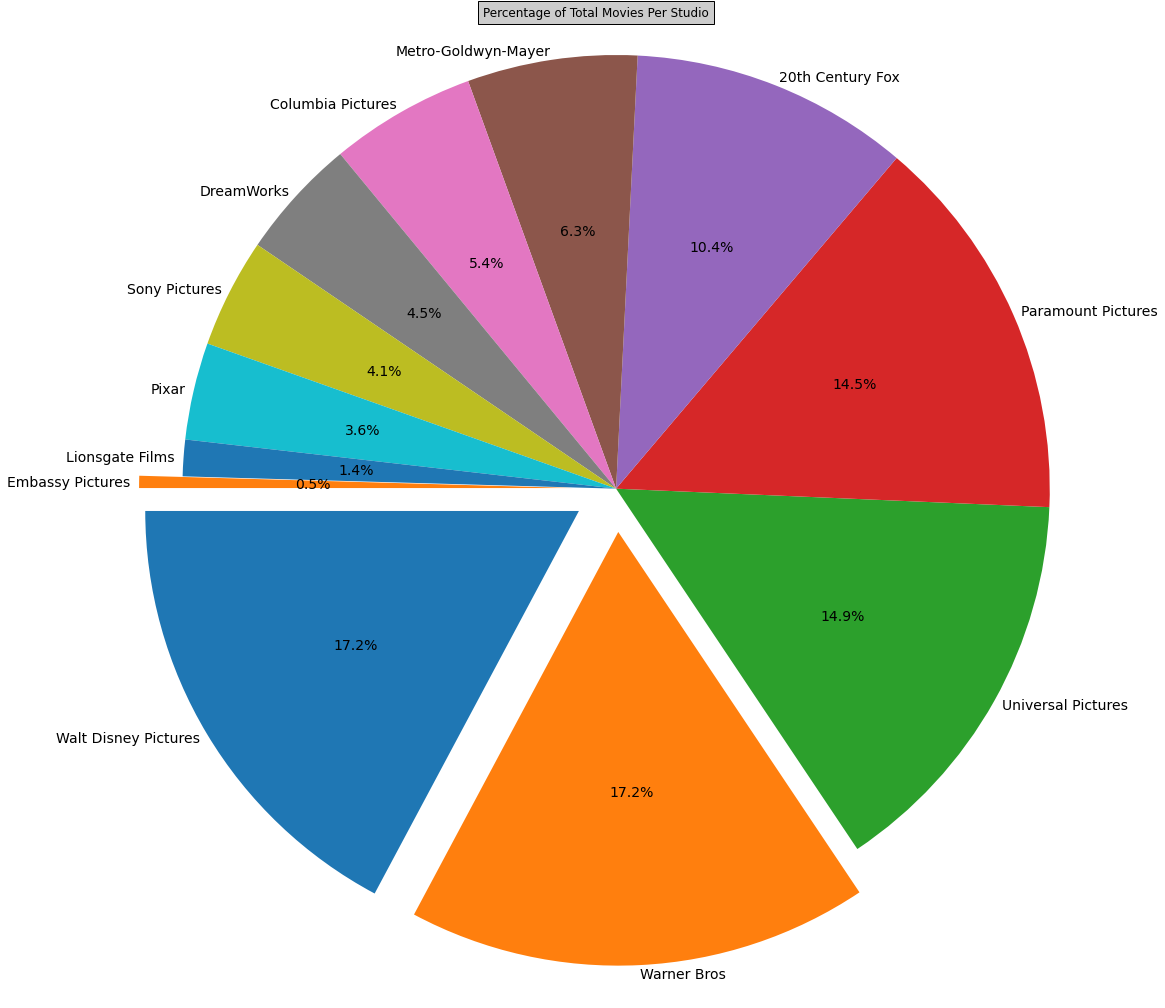

In [23]:
number_of_colors = 12

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Warner Bros", "Universal Pictures", "Paramount Pictures", "20th Century Fox", "Metro-Goldwyn-Mayer", "Columbia Pictures", "DreamWorks", "Sony Pictures", "Pixar", "Lionsgate Films", "Embassy Pictures"]

# The values of each section of the pie chart
sizes = [38, 38, 33, 32, 23, 14, 12, 10, 9, 8, 3, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0.1,0,0,0,0,0,0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,  labeldistance=1.02, autopct="%0.1f%%", textprops={'fontsize': 14}, startangle=180, explode=explode, shadow=False)
ax1.axis('equal') 
plt.title("Percentage of Total Movies Per Studio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [16]:
studio_budget = budgetbuster_df.groupby(["Studio"]).mean()["Production Budget"].sort_values(ascending=False);pd.options.display.float_format = "{:,.2f}".format
studio_budget = pd.DataFrame(studio_budget)
studio_budget

,Production Budget
Studio,
Walt Disney Pictures,"175,676,384.71"
Pixar,"134,500,000.00"
Columbia Pictures,"123,375,000.00"
Warner Bros,"109,302,631.58"
Sony Pictures,"93,777,777.78"
Lionsgate Films,"92,666,666.67"
DreamWorks,"91,800,000.00"
Paramount Pictures,"90,093,750.00"
20th Century Fox,"86,782,608.70"


*Average Production Budget Per Studio

Breakdown of average production budget per studio reflects Walt Disney Pictures averaged the highest production budget per movie with an average budget of $175,676,384.71. 

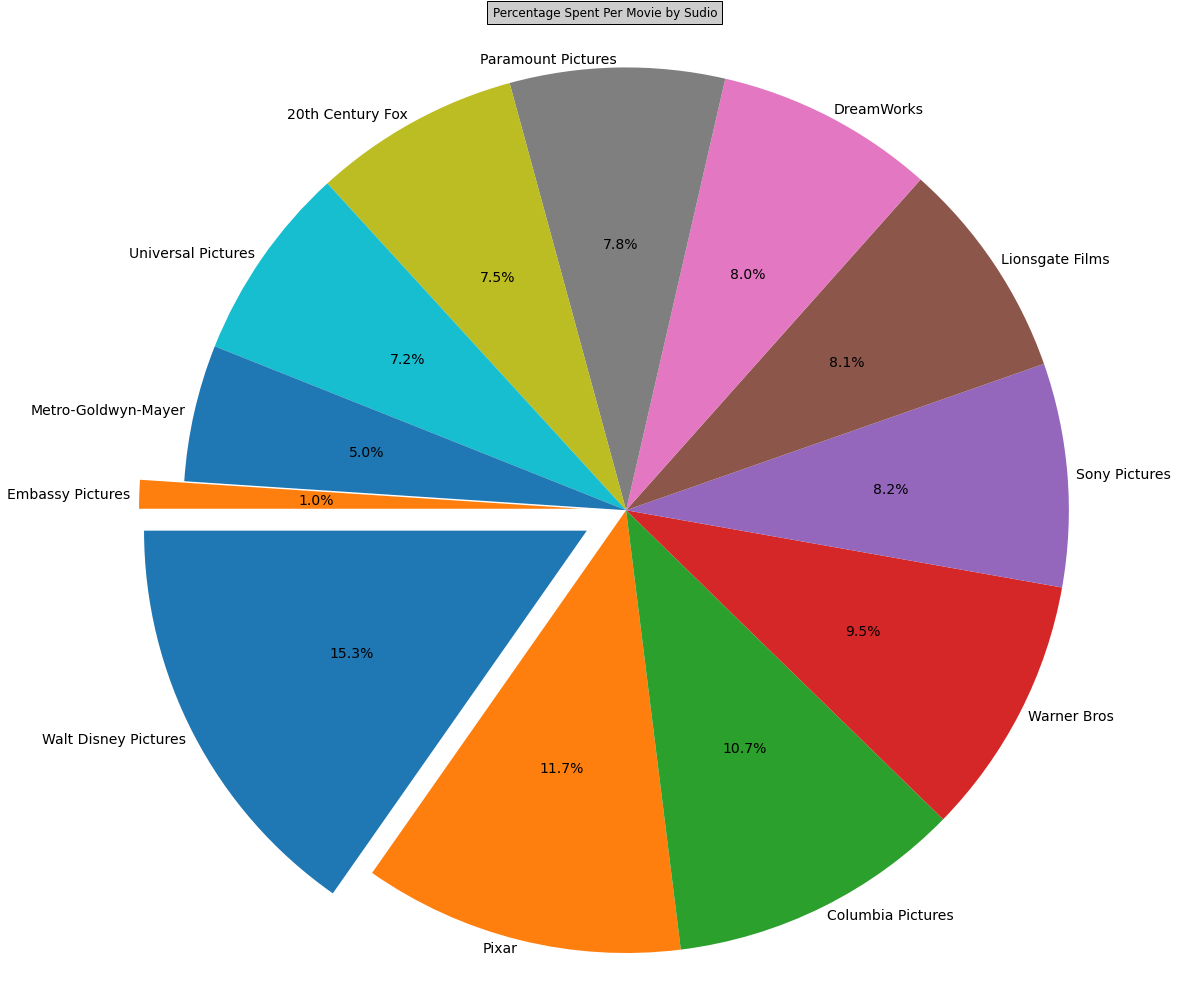

In [17]:
number_of_colors = 12

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Pixar", "Columbia Pictures", "Warner Bros ", "Sony Pictures", "Lionsgate Films", "DreamWorks", "Paramount Pictures", "20th Century Fox", "Universal Pictures", "Metro-Goldwyn-Mayer", "Embassy Pictures"]

# The values of each section of the pie chart
sizes = [175676384.71, 134500000.00, 123375000.00, 109302631.58, 93777777.78, 92666666.67, 91800000.00, 90093750.00, 86782608.70, 82575757.58, 57392857.14, 12000000.00]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,labeldistance=1.02, autopct="%0.1f%%", startangle=180, textprops={'fontsize': 14}, explode=explode, rotatelabels = False, shadow=False)
ax1.axis('equal') 
plt.title("Percentage Spent Per Movie by Sudio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [18]:
action_counts=budgetbuster_df.groupby(['Studio', 'Main Genre']).size().reset_index(name='Counts')
action_genre="Action"
action_counts.loc[action_counts['Main Genre']==action_genre].sort_values(by='Counts', ascending=False)

,Studio,Main Genre,Counts
56,Walt Disney Pictures,Action,7
41,Sony Pictures,Action,3
46,Universal Pictures,Action,3
65,Warner Bros,Action,3
0,20th Century Fox,Action,1
8,Columbia Pictures,Action,1
21,Lionsgate Films,Action,1
29,Paramount Pictures,Action,1


*Action Movies Per Studio

Based on prior data it was clear that Action movies account for the highest production budget per genre. It was also evident that Walt Disney pictures not had one of the highest production counts but also averaged the highest production budget per movie. This would lead you to assume that if we looked primarily at the Action genre, we should expect to see Walt Disney Picture with the highest count. Data proves this to be correct as Walt Disney has the highest amount of Action movies with a total count of seven. 

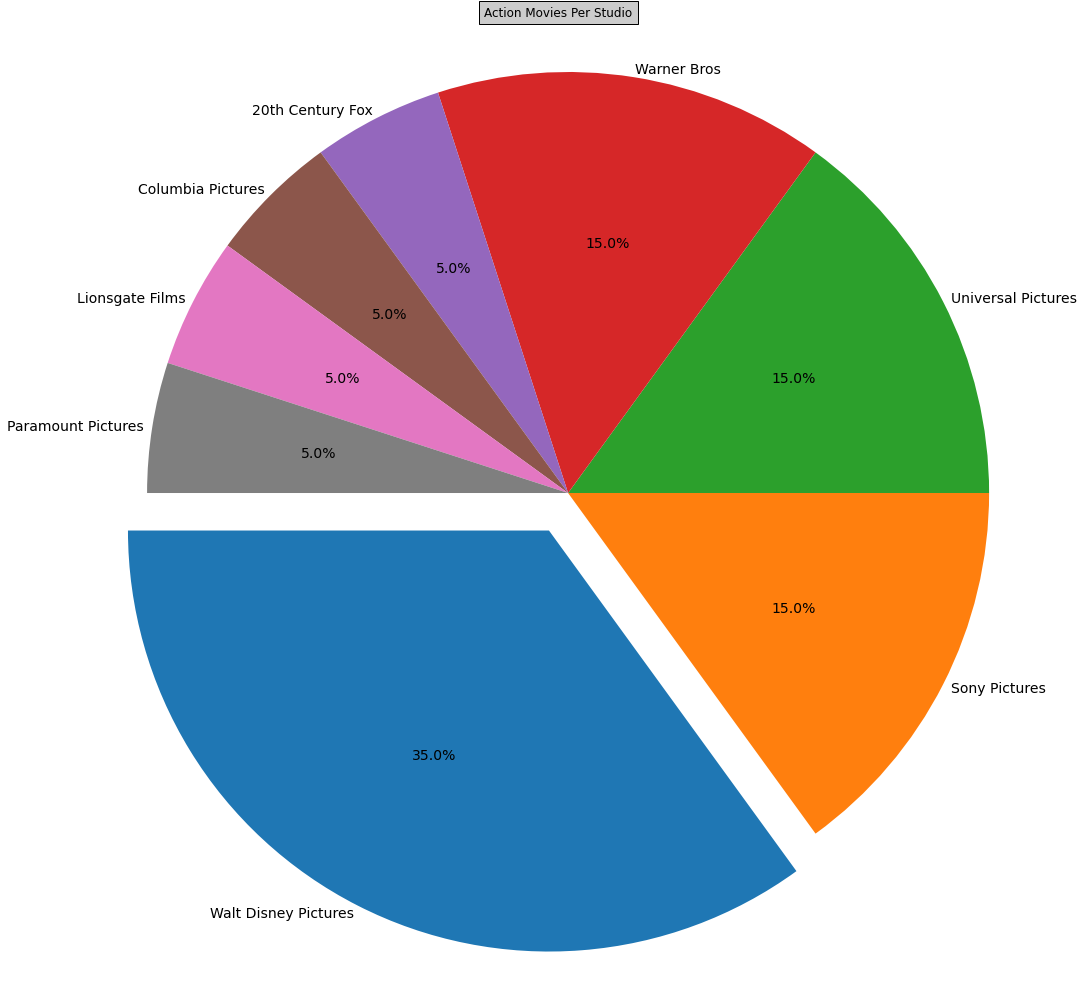

In [19]:
number_of_colors = 8

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Sony Pictures", "Universal Pictures", "Warner Bros ", "20th Century Fox", "Columbia Pictures", "Lionsgate Films", "Paramount Pictures"]

# The values of each section of the pie chart
sizes = [7, 3, 3, 3, 1, 1, 1, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,labeldistance=1.02, autopct="%0.1f%%", startangle=180, textprops={'fontsize': 14}, explode=explode, rotatelabels = False, shadow=False)
ax1.axis('equal') 
plt.title("Action Movies Per Studio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Changes in Cost Over the Years

* main - line

* 1990's

* 2000's

* 2010's

Production Costs per Genre
* pie chart - broken by genre
* pie chart - production companies

Production Cost vs Domestic and Worldwide Gross
* production cost vs domestic - scatter plot
* production cost vs worldwide

Production Cost vs Viewer Ratings
* scatter plot

Director
* bar - combined gross for movies

* top 100 movies directors